In [1]:
!pip install scalecast

You should consider upgrading via the 'C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Created wheel for scalecast: filename=SCALECAST-0.10.2-py3-none-any.whl size=63697 sha256=3c4ea456bfc1ace82a0e61dc37fad169302075abff64dd9ff47448415d6bb6d5
  Stored in directory: c:\users\praveen shahani\appdata\local\pip\cache\wheels\a6\4e\fb\c33010651b3f2da9ecf37d1841783c70d8914bfaf2de4f544f
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107749 sha256=bd73c568cc8f6f5754d2887a47242624562e78e1f67a51ada0e244a34bacd171
  Stored in directory: c:\users\praveen shahani\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built scalecast eli5


In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.mpl.rc("figure", figsize=(16, 6))

In [3]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [4]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [5]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [6]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


In [7]:
df = gross_data[['avg_ticket_price','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
df2

,month,year,avg_ticket_price
0,1,1986,6856.604414
1,1,1987,5349.268682
2,1,1988,7390.928311
3,1,1989,7563.116309
4,1,1990,5679.396554
...,...,...,...
413,12,2015,13661.215123
414,12,2016,16878.414144
415,12,2017,25069.449142
416,12,2018,28203.041785


In [17]:
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','avg_ticket_price']]
df3.set_index(['date'], inplace = True)
avg_ticket = df3.avg_ticket_price
avg_ticket = avg_ticket.asfreq("MS")
avg_ticket.values

array([ 6856.6044143 ,  6676.72539706,  7366.02458464,  6274.19561003,
        6232.22790056,  6882.49705042,  4439.46117673,  6681.6860059 ,
        5830.52478529,  5588.07348099,  6645.45422418,  5578.87830356,
        5349.2686824 ,  4860.47074255,  7179.44387687,  6805.44073118,
        7898.74131046,  5601.58389181,  5447.18494978,  6466.35686078,
        5074.68588169,  5965.30848674,  8056.85248056,  6187.57654825,
        7390.92831107,  5544.21973055,  6017.34245833,  6886.33336373,
        9400.53852806,  6874.2102422 ,  7101.90119284,  5599.16912421,
        5456.44715127,  7202.48770725,  6323.7153709 ,  6109.62934853,
        7563.11630892,  5589.70874414,  5847.67566452,  7412.88749729,
        5466.71678302,  5034.99309186,  5594.4236026 ,  4913.20016104,
        4269.35428979,  6162.66581695,  6745.65397042,  9317.33930248,
        5679.39655385,  5181.63187488,  5207.48926866,  8002.55797141,
        6536.51129224,  5813.31126739,  6405.06797143,  4784.95901339,
      

In [18]:
f = Forecaster(y=avg_ticket.values,
                   current_dates=avg_ticket.index)

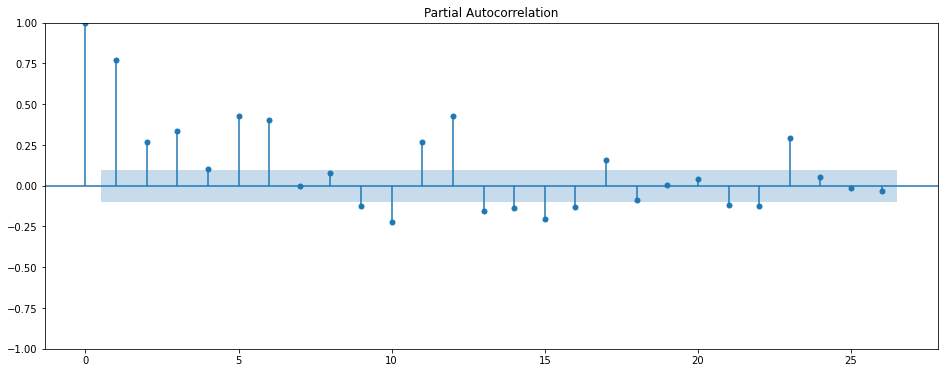

In [19]:
f.plot_pacf(lags=26)
plt.show()

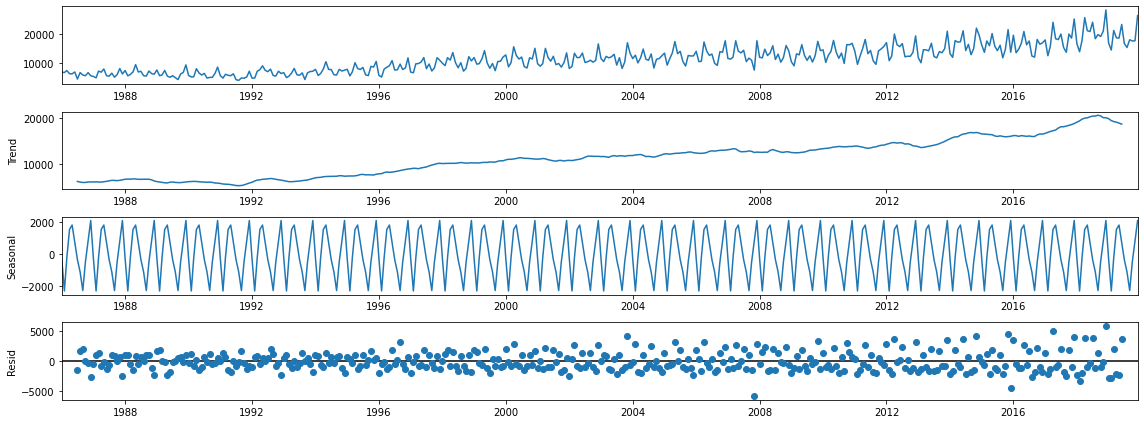

In [20]:
f.seasonal_decompose().plot()
plt.show()

In [22]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat,pval)

0.042459292585374 0.9619057213994365


In [23]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

13/13 [==============================] - 3s 4ms/step - loss: 0.2914


<AxesSubplot:xlabel='Date', ylabel='Values'>

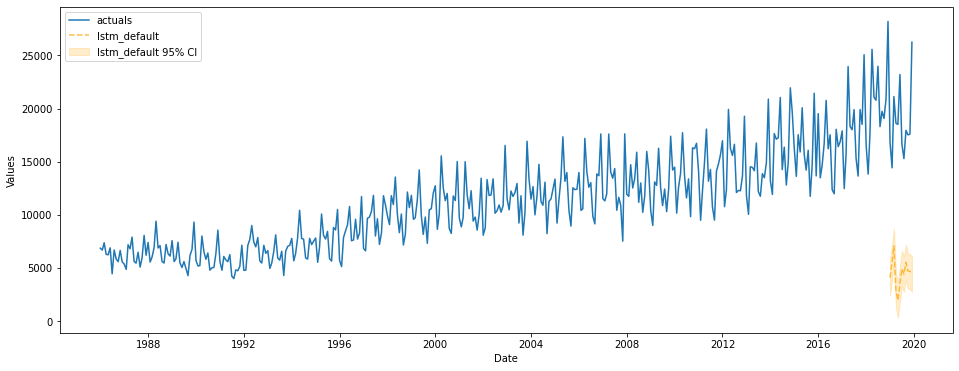

In [24]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

12/12 [==============================] - 2s 10ms/step - loss: 0.2990


<AxesSubplot:xlabel='Date', ylabel='Values'>

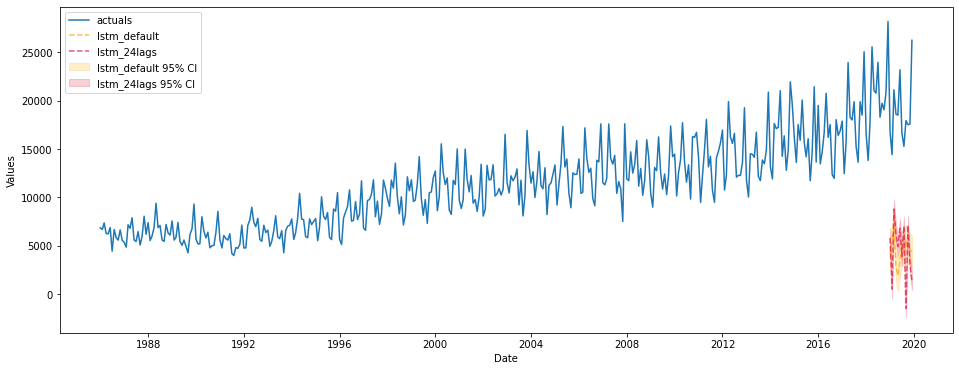

In [25]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
9/9 [==============================] - 2s 66ms/step - loss: 0.3599 - val_loss: 0.0815
Epoch 2/5
9/9 [==============================] - 0s 9ms/step - loss: 0.3370 - val_loss: 0.0669
Epoch 3/5
9/9 [==============================] - 0s 8ms/step - loss: 0.3134 - val_loss: 0.0556
Epoch 4/5
9/9 [==============================] - 0s 9ms/step - loss: 0.2876 - val_loss: 0.0497
Epoch 5/5
9/9 [==============================] - 0s 8ms/step - loss: 0.2580 - val_loss: 0.0521
Epoch 1/5
10/10 [==============================] - 3s 61ms/step - loss: 0.3485 - val_loss: 0.0765
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 0.3195 - val_loss: 0.0682
Epoch 3/5
10/10 [==============================] - 0s 13ms/step - loss: 0.2910 - val_loss: 0.0661
Epoch 4/5
10/10 [==============================] - 0s 14ms/step - loss: 0.2639 - val_loss: 0.0675
Epoch 5/5
10/10 [==============================] - 0s 15ms/step - loss: 0.2392 - val_loss: 0.0726


<AxesSubplot:xlabel='Date', ylabel='Values'>

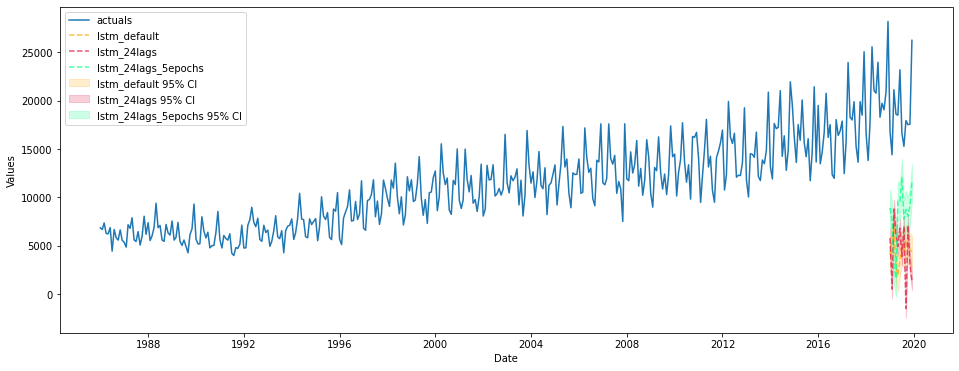

In [26]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
9/9 [==============================] - 7s 212ms/step - loss: 0.3423 - val_loss: 0.0634
Epoch 2/25
9/9 [==============================] - 0s 20ms/step - loss: 0.2667 - val_loss: 0.1023
Epoch 3/25
9/9 [==============================] - 0s 19ms/step - loss: 0.1953 - val_loss: 0.1806
Epoch 4/25
9/9 [==============================] - 0s 22ms/step - loss: 0.1608 - val_loss: 0.1334
Epoch 5/25
9/9 [==============================] - 0s 19ms/step - loss: 0.1317 - val_loss: 0.1497
Epoch 6/25
9/9 [==============================] - 0s 27ms/step - loss: 0.1113 - val_loss: 0.1302
Epoch 1/25
10/10 [==============================] - 8s 157ms/step - loss: 0.3494 - val_loss: 0.0710
Epoch 2/25
10/10 [==============================] - 0s 25ms/step - loss: 0.2632 - val_loss: 0.1101
Epoch 3/25
10/10 [==============================] - 0s 26ms/step - loss: 0.2028 - val_loss: 0.1150
Epoch 4/25
10/10 [==============================] - 0s 26ms/step - loss: 0.1560 - val_loss: 0.1073
Epoch 5/25
10/10 [==

<AxesSubplot:xlabel='Date', ylabel='Values'>

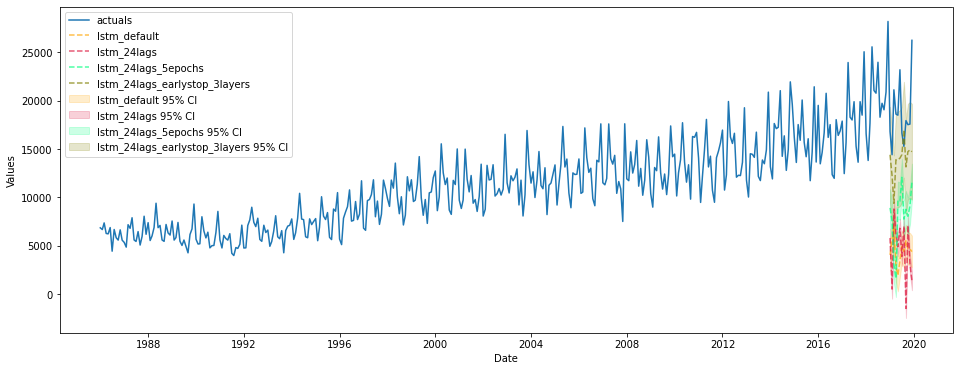

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
9/9 [==============================] - 10s 296ms/step - loss: 0.2517 - val_loss: 0.1358
Epoch 2/15
9/9 [==============================] - 1s 92ms/step - loss: 0.1047 - val_loss: 0.1252
Epoch 3/15
9/9 [==============================] - 1s 84ms/step - loss: 0.0921 - val_loss: 0.0856
Epoch 4/15
9/9 [==============================] - 1s 86ms/step - loss: 0.0846 - val_loss: 0.0581
Epoch 5/15
9/9 [==============================] - 1s 87ms/step - loss: 0.0830 - val_loss: 0.0496
Epoch 6/15
9/9 [==============================] - 1s 91ms/step - loss: 0.0820 - val_loss: 0.0542
Epoch 7/15
9/9 [==============================] - 1s 88ms/step - loss: 0.0819 - val_loss: 0.0604
Epoch 8/15
9/9 [==============================] - 1s 88ms/step - loss: 0.0818 - val_loss: 0.0579
Epoch 9/15
9/9 [==============================] - 1s 84ms/step - loss: 0.0822 - val_loss: 0.0621
Epoch 10/15
9/9 [==============================] - 1s 87ms/step - loss: 0.0818 - val_loss: 0.0580
Epoch 11/15
9/9 [==========

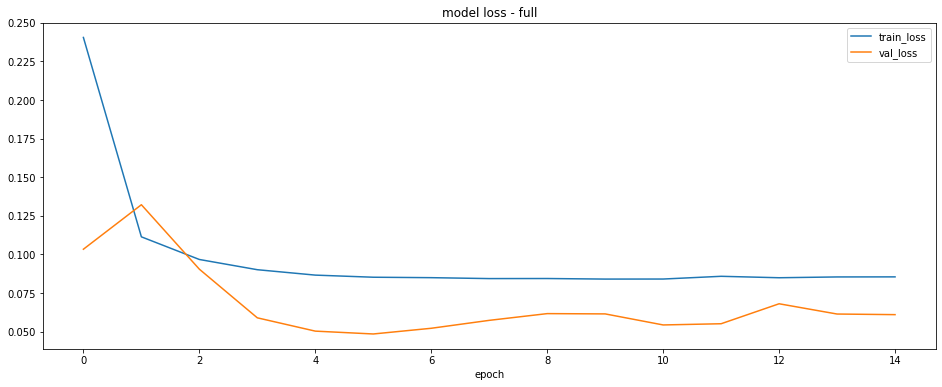

<AxesSubplot:xlabel='Date', ylabel='Values'>

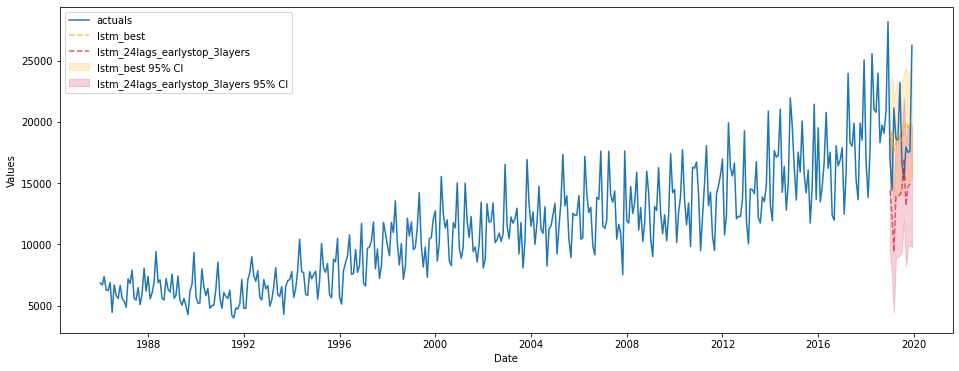

In [28]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [29]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

<AxesSubplot:xlabel='Date', ylabel='Values'>

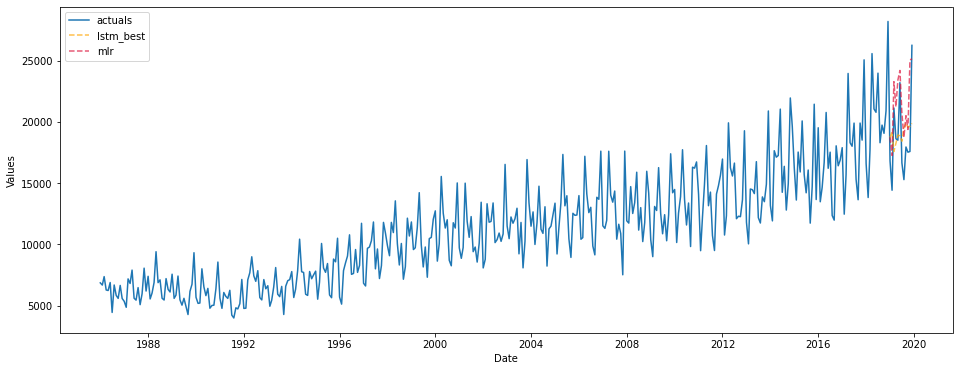

In [30]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

<AxesSubplot:xlabel='Date', ylabel='Values'>

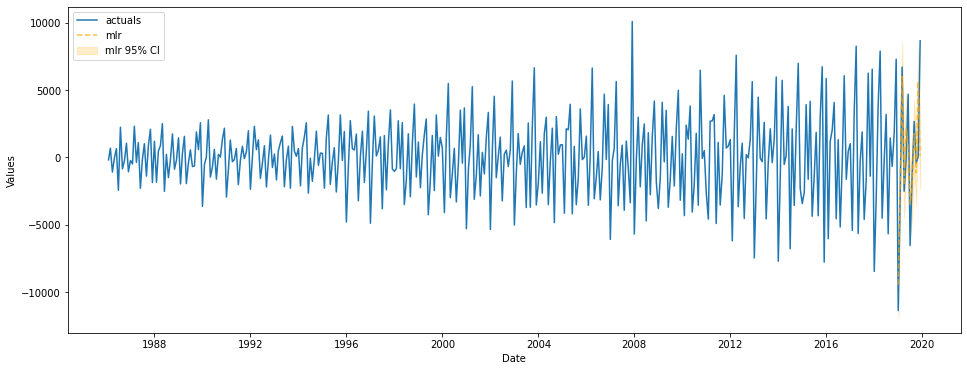

In [32]:
f.plot_test_set(models='mlr',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

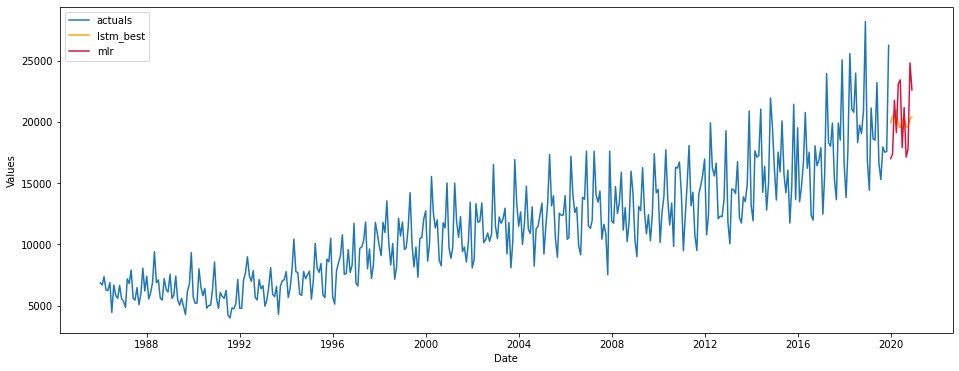

In [33]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [34]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm_best,0.150856,3317.492727,-0.063627,True
1,mlr,0.170585,3460.822144,-0.157519,False
2,lstm_24lags_earlystop_3layers,0.250651,6150.061824,-2.655346,False
3,lstm_24lags_5epochs,0.552629,11272.693672,-11.280752,False
4,lstm_default,0.752855,14631.745287,-19.690063,False
5,lstm_24lags,0.754864,14767.404276,-20.075500,False
